Факторный анализ
================

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [15]:
df_2 = pd.read_csv('Swiss Fertility.csv', sep=';', decimal=',', index_col=0)
df_2.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [4]:
#  df = df.filter(regex='^(?!.*Unnamed).*$')
#  df.head()

In [5]:
df_2.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [6]:
df_2.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant_Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


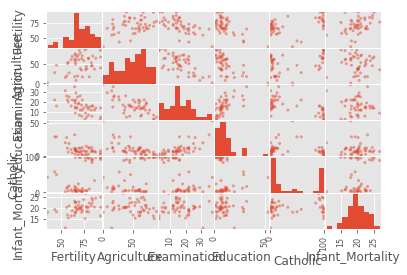

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_2);

Видим, что данные фичи далеки от нормальных, корреляции между фичами не наблюдается. Попробуем с помощью факторного анализа построить новые фичи, которые были бы более удобными в использовании с минимальной потерей информации.

Используем класс ```FactorAnalysis``` из ```sklearn.decomposition```. Не забудем стандартизировать данные. Это важно.
Начнём с двух факторов.

In [13]:
import math
from sklearn import preprocessing
#  from sklearn.decomposition import PCA


# Функция для стандартизации фич
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled


In [19]:
from sklearn.decomposition import FactorAnalysis

df_scaled = preprocessing.scale(df_2)
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=3,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

Координаты факторов в пространстве старых фич находятся в атрибуте ```components_```.

In [20]:
pd.DataFrame(fa.components_, columns=df_2.columns)

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
0,-0.849643,-0.668730,0.838057,0.887996,-0.473847,-0.235409
1,0.204352,-0.060695,-0.151733,0.371261,0.744381,0.234170
2,-0.379035,0.527681,-0.258278,-0.041596,0.242989,-0.429940


In [21]:
fa.noise_variance_

array([0.09409999, 0.26972951, 0.20769052, 0.07248707, 0.16307594,
       0.70439494])

Уникальность фич в смысле дисперсии, объяснённой факторами (чем больше, тем хуже объясняется факторами) содержится в атрибуте ```noise_variance_```.

In [22]:
print('Uniqueness:')
pd.Series(fa.noise_variance_, df.columns)

Uniqueness:


LUNGES     0.487766
BITES      0.076163
ZIGZAGS    0.857251
NEST       0.222906
SPINES     0.866169
DNEST      0.656093
BOUT       0.863093
dtype: float64

Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод ```transform```.

In [23]:
scores = pd.DataFrame(fa.transform(df_scaled), columns=['factor1', 'factor2'])
scores.head()

,factor1,factor2
0,-0.938788,-0.776068
1,-0.159453,-0.591389
2,-0.818776,-0.458188
3,1.444012,0.094633
4,-0.638620,3.662073


In [24]:
scores

,factor1,factor2
0,-0.938788,-0.776068
1,-0.159453,-0.591389
2,-0.818776,-0.458188
3,1.444012,0.094633
4,-0.638620,3.662073
5,0.397292,-0.037810
6,2.342290,0.179116
7,-0.151254,0.045436
8,1.072923,-0.406284
9,-0.908872,0.227997
